# First OOMMFC notebook

After testing the installation of both OOMMF Calculator and OOMMF (on host machine or Docker), we can now run the first Jupyter notebook.

## Running Jupyter notebook

The Jupyter notebook can be started by executing
```
jupyter notebook
```
command in your terminal (command prompt). A detailed documentation of all powerful Jupyter notebook features can be found at the Project Jupyter website: http://jupyter.org

However, all you need to know to execute your first OOMMFC notebook is that individual cells containing Python code are executed by pressing `Shift` + `Return`. 

**Note:** If you are reading this notebook online (as a part of OOMMFC documentation), you can download the file linked to this URL on your machine:

https://raw.githubusercontent.com/joommf/oommfc/master/docs/ipynb/first_oommfc_notebook.ipynb

Alternatively, you can download the entire repository from GitHub from:

https://github.com/joommf/oommfc/archive/master.zip

unzip the downloaded file, and access all notebooks in `docs/ipynb` (navigate to this directory and run `jupyter notebook` in it).

## Simple micromagnetic problem

As the first step, we need to import `oommfc` and `discretisedfield`.

In [1]:
import oommfc as oc
import discretisedfield as df

Now, we create a very simple system object and provide:

- Hamiltonian,
- dynamics, and
- magnetisation configuration.

In [2]:
system = oc.System(name="first_notebook")

We define the mesh by providing two points between which the domain spans as well as the size of the discretisation cell.

In [3]:
L = 100e-9
d = 10e-9
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Our Hamiltonian contains only exchange, demagnetisation, and Zeeman energy terms. We will apply the external magnetic field in the "x" direction, because that allows us to easily predict the equilibrium state of such micromagnetic system.

In [4]:
A = 1e-12
H = (8e6, 0, 0)
system.hamiltonian = oc.Exchange(A=A) + oc.Demag() + oc.Zeeman(H=H)

Dynamics of the system is governed by the LLG equation containing precession and damping terms.

In [5]:
alpha = 0.2
system.dynamics = oc.Precession(gamma=oc.gamma0) + oc.Damping(alpha=alpha)

We initialise the system in (0, 0, 1) direction, which is clearly different from our expected equlibrium state.

In [6]:
system.m = df.Field(mesh, value=(0, 1, 0), norm=8e6)

We can check the characteristics of the system we defined

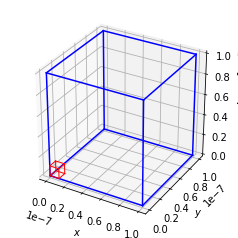

In [7]:
%matplotlib inline
mesh

In [8]:
system.hamiltonian

Exchange(A=1e-12, name="exchange") + Demag(name="demag") + Zeeman(H=(8000000.0, 0, 0), name="zeeman")

In [9]:
system.dynamics

Precession(gamma=221276.14872118403, name="precession") + Damping(alpha=0.2, name="damping")

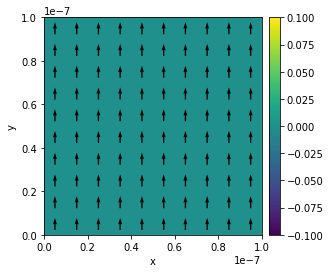

In [10]:
fig = system.m.plot_plane("z")

After the system object is created, we can minimise its energy (relax it) using the Minimisation Driver (`MinDriver`).

In [11]:
md = oc.MinDriver()
md.drive(system)

2017/9/25 14:36: Calling OOMMF (first_notebook/first_notebook.mif) ... [0.6s]


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

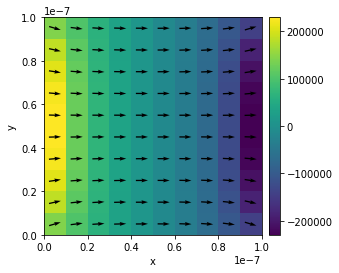

In [12]:
fig = system.m.plot_plane("z")

In [13]:
system.m.average

(7943727.6924090749, 3.4479801775887612e-05, 1.6530975699424742e-11)

We can see that the magnetisation is aligned along the "x" direction, as expected having in mind we applied the external magnetic field in that direction.